Importing Relevant Packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set_theme()

Loading and Transforming the Data

In [7]:
raw_csv_data = pd.read_csv("data/Index2018.csv")

In [8]:
df_comp = raw_csv_data.copy()
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [10]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)

In [13]:
df_comp.set_index("date", inplace = True)

In [14]:
df_comp = df_comp.asfreq("b")

In [15]:
df_comp = df_comp.ffill()

In [16]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Removing Surplus Data

In [17]:
df_comp["market_value"] = df_comp.spx

In [18]:
df_comp.head(3)

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13


In [19]:
del df_comp["spx"], df_comp["dax"], df_comp["ftse"], df_comp["nikkei"]

In [20]:
size = int(len(df_comp) * 0.8)

In [21]:
df, df_test = df_comp[:size], df_comp[size:]

White Noise

In [24]:
wn = np.random.normal(loc = df_comp.market_value.mean(), scale = df_comp.market_value.std(), size = len(df_comp))

In [25]:
df_comp["wn"] = wn

In [26]:
df_comp.describe()

,market_value,wn
count,6277.000000,6277.000000
mean,1288.642547,1280.926698
std,487.868210,489.562445
min,438.920000,-926.931891
25%,992.715221,952.373841
50%,1233.761241,1286.831203
75%,1460.250000,1614.283469
max,2872.867839,2999.065135


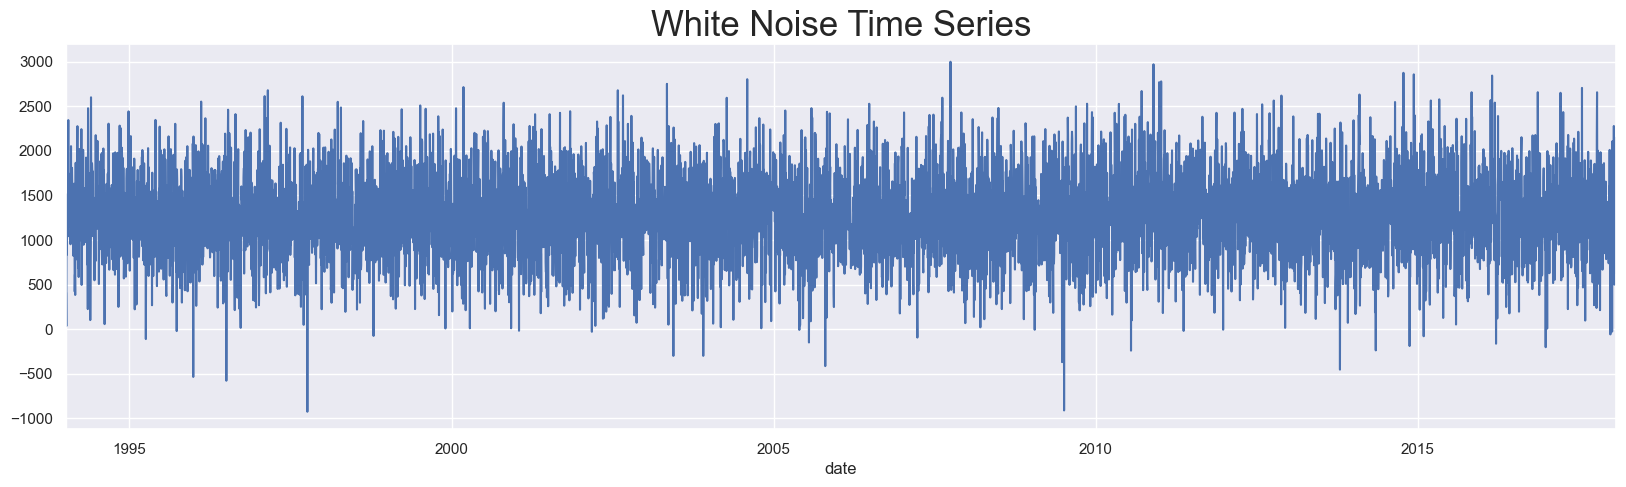

In [30]:
df_comp.wn.plot(figsize=(20,5))
plt.title("White Noise Time Series", size = 25)
plt.show()

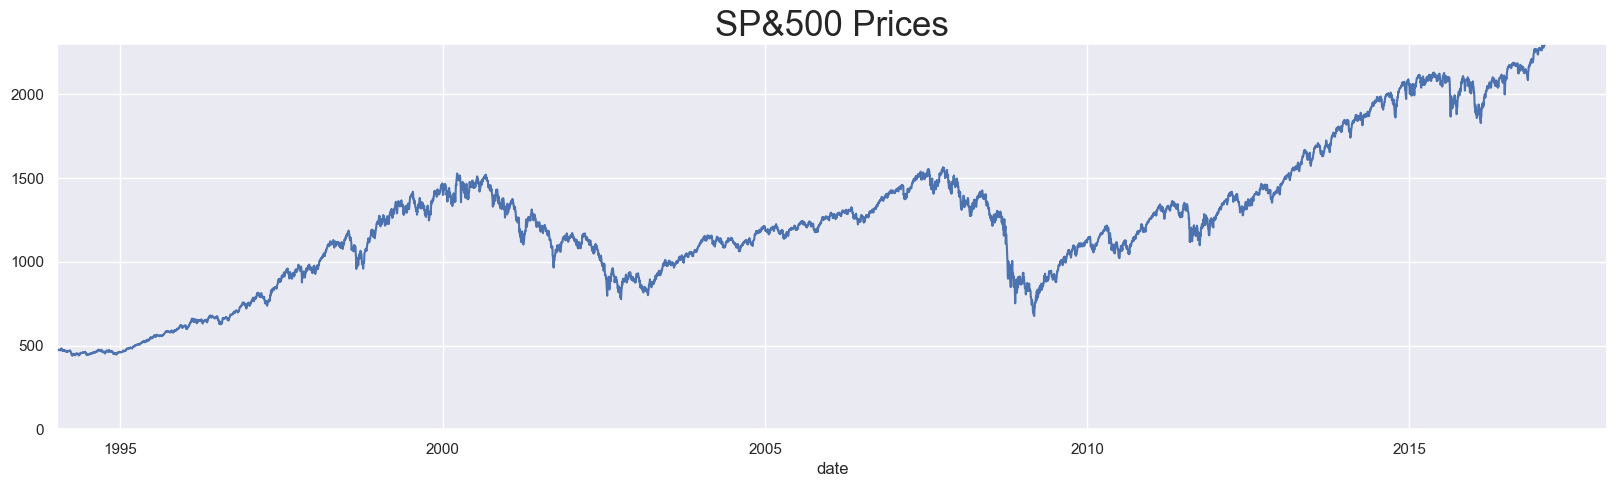

In [38]:
df_comp.market_value.plot(figsize=(20,5))
plt.title("SP&500 Prices", size = 25)
plt.ylim(0,2300)
plt.show()